# 4.1 Regression 
## 1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#import data from prof's repository
data=pd.read_csv("/home/pers/allouche/PHY2446M/Data/linear-regression-dataset.csv")

x = data["experience"].to_frame()
y = data["salary"].to_frame()
print(y)

    salary
0     2500
1     2250
2     2750
3     8000
4     9000
5     6900
6    20000
7     8500
8     6000
9     3500
10   15000
11   13000
12   18000
13    7500


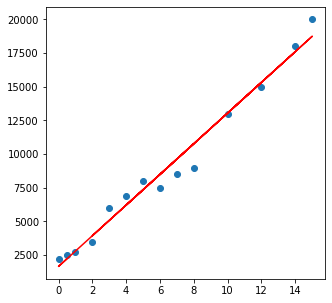

In [5]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)
y_predict = model.predict(x)

plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.plot(x,y_predict,c='red')

In [6]:
r2 = model.score(x,y)
print('R2= ',r2)
score = np.sqrt(r2)
print('score= ', score)

R2=  0.9775283164949903
score=  0.9887003168275968


## 2)

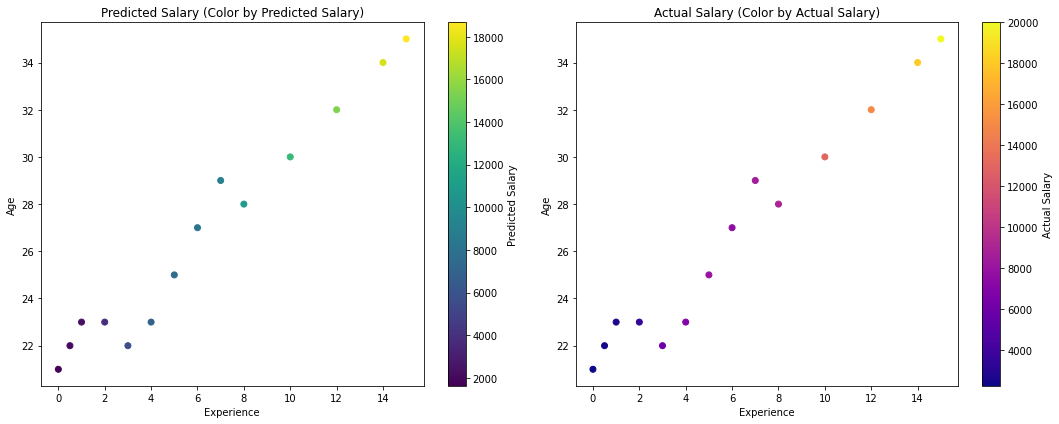

model coef a=  [1525.50072054 -416.72218625] 
 model intercept b=  10376.627472275013
R2=  0.9818393838730447  ; score=  0.9908780872907851


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import data from prof's repository
data_multi = pd.read_csv("/home/pers/allouche/PHY2446M/Data/multiple-linear-regression-dataset.csv")
df_multi = pd.DataFrame(data_multi)

# Linear Regression fit features defined
X = data_multi[['experience', 'age']]
y_multi = data_multi['salary']

# Create a LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X, y_multi)
r2_multi = model.score(X, y_multi)

# Linear regression predictions
y_multi_predict = model.predict(X)

# Create a 2D scatter plot with color representing predicted salary
plt.figure(figsize=(15, 6))

# Subplot 1: Scatter plot with color representing predicted salary
plt.subplot(1, 2, 1)
scatter = plt.scatter(data_multi['experience'], data_multi['age'], c=y_multi_predict, cmap="viridis")
plt.xlabel('Experience')
plt.ylabel('Age')
plt.title('Predicted Salary (Color by Predicted Salary)')
plt.colorbar(scatter, label='Predicted Salary')

# Subplot 2: Original scatter plot with color representing actual salary
plt.subplot(1, 2, 2)
scatter = plt.scatter(data_multi['experience'], data_multi['age'], c=data_multi['salary'], cmap="plasma")
plt.xlabel('Experience')
plt.ylabel('Age')
plt.title('Actual Salary (Color by Actual Salary)')
plt.colorbar(scatter, label='Actual Salary')

plt.tight_layout()
plt.show()

a = model.coef_
b = model.intercept_
print('model coef a= ',a,'\n','model intercept b= ',b)
print('R2= ',r2_multi,' ; score= ',np.sqrt(r2_multi))

By linear plot of predicted salar, what is ment? a 3D graph with a plane? 

Let's compute the predicted salaries for Dunder-Mifflin eployees:
Dwight Shrute = Aged(25),Exp(10) and Erin Hannon = Aged(25),Exp(3) 

In [8]:
def salary(model,Experience,Age):
    X = np.array([Experience, Age]).reshape(1,2) #1ligne 2columns
    return model.predict(X)
    
Dwight_sal = salary(model,10,25)
Erin_sal = salary(model,3,25)
Aras_sal =salary(model,0.71,25) #supposedly I have worked around 250 renumeretted days in my life 

print('Dwight will have a predicted salary of: ',Dwight_sal)
print('Erin will have a predicted salary of: ',Erin_sal)
print('Aras will have a predicted salary of: ',Aras_sal)

Dwight will have a predicted salary of:  [15213.5800213]
Erin will have a predicted salary of:  [4535.07497755]
Aras will have a predicted salary of:  [1041.67832752]


## 3)

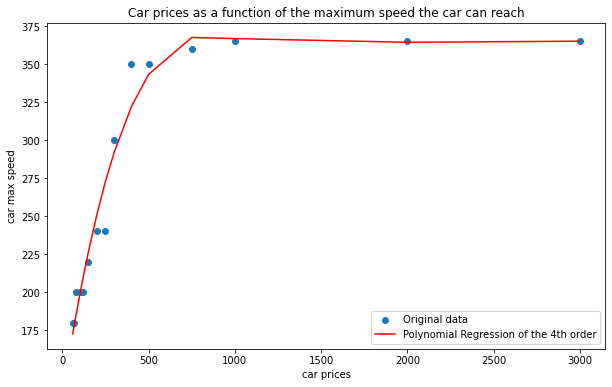

for f(x)= ax^4 + bx^3 + cx^2 + dx + e, we have a: 0.0, b: 0.7562086941367148, c: -0.0008256415224444021, d: 3.5939135366270733e-07, e: -5.316469486871256e-11
R2=  0.9818393838730447  ; score=  0.9908780872907851


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

 
# Import data from prof's repository
data_polynom = pd.read_csv("/home/pers/allouche/PHY2446M/Data/polynomial-regression.csv")
df_polynom = pd.DataFrame(data_polynom)

# Training
X = df_polynom[['car_price']]
X_poly = PolynomialFeatures(4).fit_transform(X)
Y = df_polynom['car_max_speed']
model = LinearRegression().fit(X_poly,Y)
df_polynom['Y_predicted'] = model.predict(X_poly)

# Make a scatter plot of the original data
plt.figure(figsize=(10,6))
plt.title('Car prices as a function of the maximum speed the car can reach')
plt.scatter(df_polynom['car_price'], df_polynom['car_max_speed'], label='Original data')

# Plot the polynomial regression line
plt.plot(df_polynom['car_price'], df_polynom['Y_predicted'], label= 'Polynomial Regression of the 4th order', c='red')

plt.xlabel('car prices')
plt.ylabel('car max speed')
plt.legend()
plt.show()

# Extract coefficients
coefficients = model.coef_

# Print coefficients
a, b, c, d, e = coefficients[0], coefficients[1], coefficients[2], coefficients[3], coefficients[4]
print(f'for f(x)= ax^4 + bx^3 + cx^2 + dx + e, we have a: {a}, b: {b}, c: {c}, d: {d}, e: {e}')
# Show accuracy
print('R2= ',r2_multi,' ; score= ',np.sqrt(r2_multi))

## 4)

-0.17405265587015561


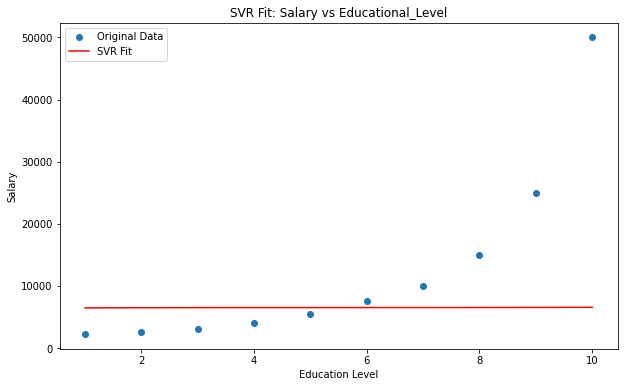

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

salary = pd.read_csv("salaries.csv")
df_salary = pd.DataFrame(salary)

# Print the column names to inspect
print(df_salary.columns)

# Strip potential whitespaces from column names
df_salary.columns = df_salary.columns.str.strip()

# Normalization
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the feature data
x_np = x_.values.reshape(-1, 1)
x_normalized = scaler.fit_transform(x_np)

# Convert y_ to a numpy array
y_np = y_.values.reshape(-1, 1)

# fit Support Vector Regression (SVR) model
svr = SVR(kernel='poly')  # You can choose different kernels like 'linear', 'rbf', etc.
svr.fit(x_normalized, y_np.ravel())

print(svr.score(x_normalized, y_np.ravel()))

# Predict using the trained SVR model
y_pred = svr.predict(x_normalized)

# Plot the results
plt.figure(figsize=(10,6))
plt.title('SVR Fit: Salary vs Educational_Level')
plt.scatter(x_,y_,label='Original Data')
plt.plot(x_,y_pred,label='SVR Fit',c='red')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

#### (I don't know what is the error here, R2<0 indicates that there is something wrong)
## 5)

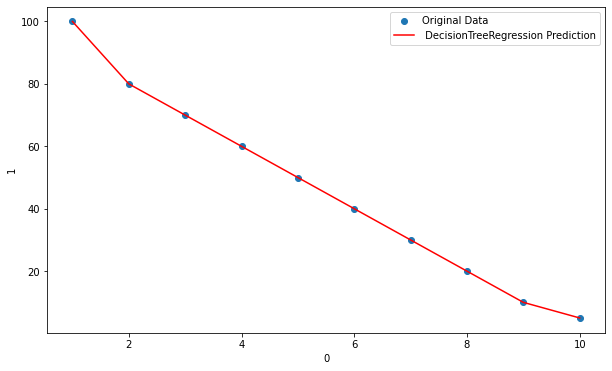

R^2 Score: -47315.70450163576


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

tree = pd.read_csv("/home/pers/allouche/PHY2446M/Data/decision-tree-regression-dataset.csv", header=None)
df_tree = pd.DataFrame(tree)

# Training
x5 = df_tree.iloc[:, :-1]  # All columns except the last one
y5 = df_tree.iloc[:, -1]   # The last column

model = DecisionTreeRegressor().fit(X, y)

# Predictions
y5_pred = pd.DataFrame(model.predict(X))

# Plot with scatter
plt.figure(figsize=(10,6))
plt.scatter(x5,y5,label='Original Data')
plt.plot(x5,y5_pred,label=' DecisionTreeRegression Prediction',c='red')
plt.xlabel('0')
plt.ylabel('1')
plt.legend()

plt.show()

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print(f'R^2 Score: {r2}')

## 6)

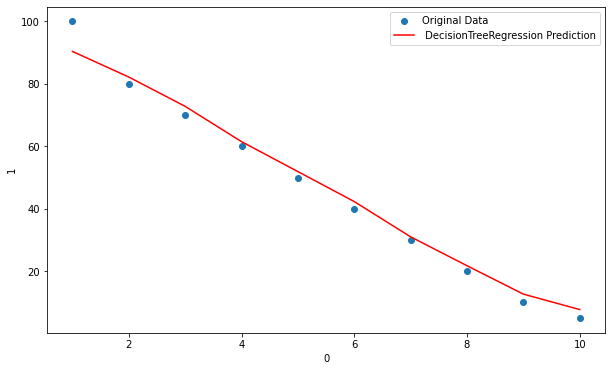

R^2 Score: -47315.70450163576


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

forest = pd.read_csv("/home/pers/allouche/PHY2446M/Data/random-forest-regression-dataset.csv", header=None)
df_forest = pd.DataFrame(forest)

# Training
x6 = df_tree.iloc[:, :-1]  # All columns except the last one
y6 = df_tree.iloc[:, -1]   # The last column

model = RandomForestRegressor().fit(X, y)

# Predictions
y6_pred = pd.DataFrame(model.predict(X))

# Plot with scatter
plt.figure(figsize=(10,6))
plt.scatter(x6,y6,label='Original Data')
plt.plot(x6,y6_pred,label=' DecisionTreeRegression Prediction',c='red')
plt.xlabel('0')
plt.ylabel('1')
plt.legend()

plt.show()

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print(f'R^2 Score: {r2}')